# ***Importing the some important Library***

In [1]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# *** DataSet ***

In [3]:
# This DataSet Contains the hand images of the numaric latters 
columns_name = []
for i in range(400):
    columns_name.append('p-' + str(i+1))
columns_name.append('class')
# df.columns = columns_name

data = pd.read_csv('data.csv', names=columns_name)

print data 

In [4]:
data.columns

Index(['p-1', 'p-2', 'p-3', 'p-4', 'p-5', 'p-6', 'p-7', 'p-8', 'p-9', 'p-10',
       ...
       'p-392', 'p-393', 'p-394', 'p-395', 'p-396', 'p-397', 'p-398', 'p-399',
       'p-400', 'class'],
      dtype='object', length=401)

In [5]:
data.head(4)

,p-1,p-2,p-3,p-4,p-5,p-6,p-7,p-8,p-9,p-10,...,p-392,p-393,p-394,p-395,p-396,p-397,p-398,p-399,p-400,class
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [6]:
print("Class Distribution : ")
print(data['class'].value_counts())

Class Distribution : 
0    500
1    500
2    500
3    500
4    500
5    500
6    500
7    500
8    500
9    500
Name: class, dtype: int64


In [7]:
def plot_digit(X, y, index):
    img = np.array([X.loc[index]]).reshape(20,20)
    img = np.rot90(img)
    img = np.rot90(img)
    img = np.rot90(img)
    img = np.flip(img, axis=1)
    plt.imshow(img, cmap='Greys', interpolation = 'nearest')
    plt.title(f'true label  {y[index]}')
    plt.show()

Visualizing the Data 

(5000, 400)
(5000,)


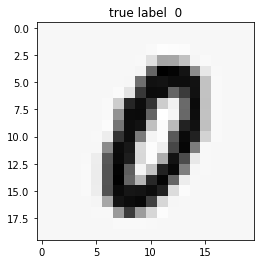

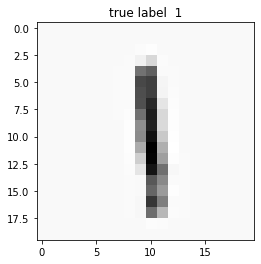

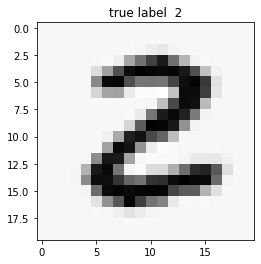

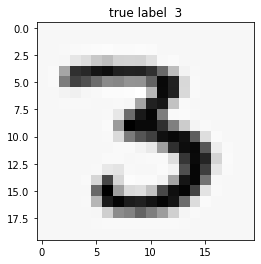

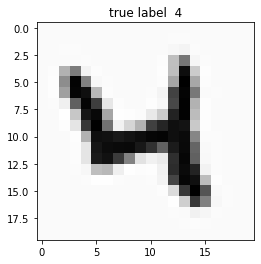

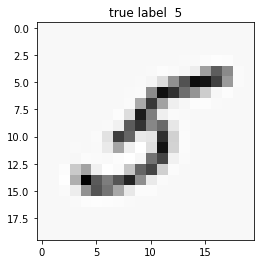

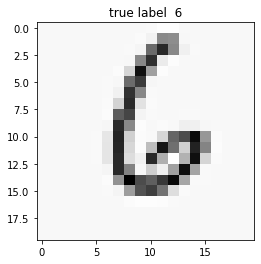

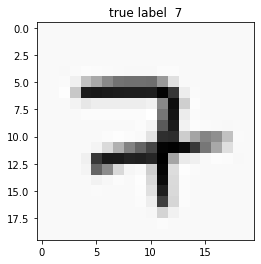

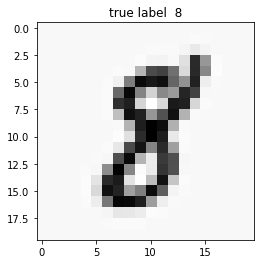

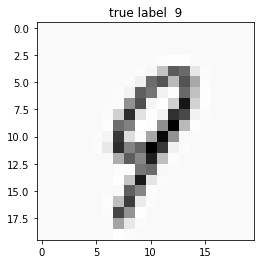

In [8]:
X = data.drop(labels='class',axis='columns')
y = data['class'] 
print(X.shape) 
print(y.shape) 
list_t = [2, 502, 1002, 1502, 2002, 2502, 3002, 3502, 4002, 4502]

for i in list_t:
    plot_digit(X, y, i)

# *** Logistic regression ***

In [9]:
D0 = data.copy();D1 = data.copy();D2 = data.copy();D3 = data.copy();D4 = data.copy();D5 =data.copy();D6 = data.copy();D7 = data.copy();D8 = data.copy();D9 = data.copy() 

In [10]:
datasets = [D0,D1,D2,D3,D4,D5,D6,D7,D8,D9] 

In [11]:
for i in range(10):
  for j in range(5000):
    if datasets[i].at[j,'class'] == i:
      datasets[i].at[j,'class'] = 1
    else:
      datasets[i].at[j,'class'] = 0

In [12]:
#TrainTest_datadict['key'][0] ==> X && TrainTest_datadict['key'][1] ==> y
TrainTest_datadict = {}   
 #399 --> X 400 --> y
for i in range(10):
  X = datasets[i].iloc[:,:399]  
  X = X.T
  y = datasets[i].iloc[:,-1]  
  y = np.array([y])
  TrainTest_datadict['D'+str(i)] = [X,y]   

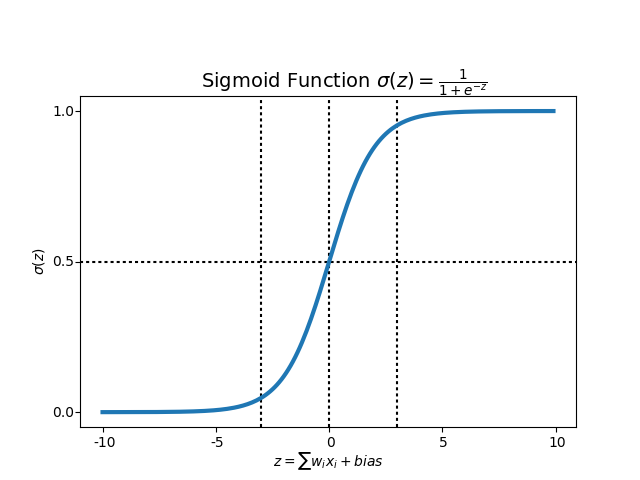

In [13]:
img = Image(filename='images//sigmod.png') 
display(img) 

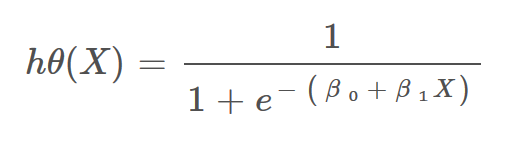

In [14]:
img = Image(filename='images//equation .png') 
display(img) 

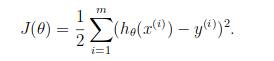

In [15]:
img = Image(filename='images//cost funtion.png') 
display(img) 


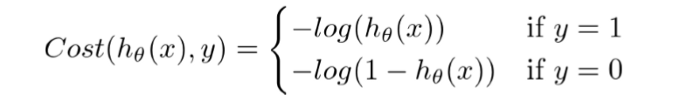

In [16]:
img = Image(filename='images//cost funtion 1 .png') 
display(img) 

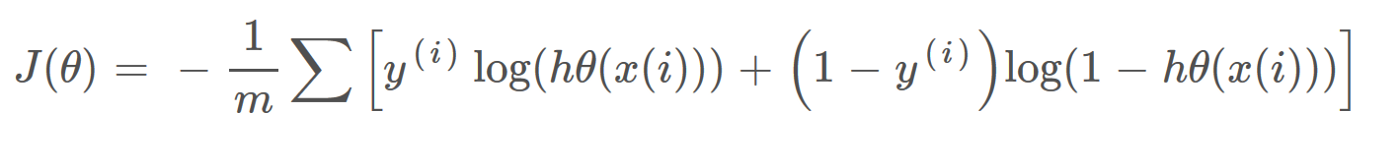

In [17]:
img = Image(filename='images//gradiant decent.png') 
display(img) 

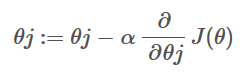

In [18]:
img = Image(filename='images//gradiant basic.png') 
display(img) 


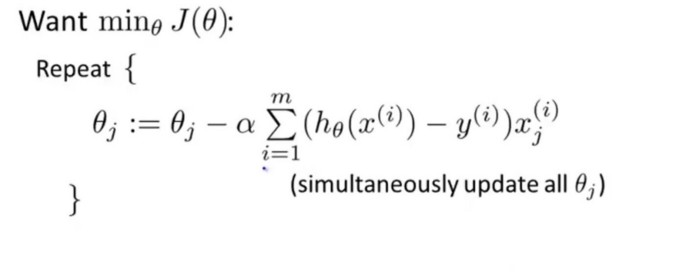

In [19]:
img = Image(filename='images//gradiant decent.jpeg') 
display(img) 


 Main code 

In [20]:
itterations = 10000   #random big value 
alpha = 0.160  
m = 5000 
cost_values = [] 
trained_parameters = [] 

# This for loop is for all the classes 0 - 10 thats it.
for class_index in range(10):
	X = TrainTest_datadict['D'+str(class_index)][0]  
	y = TrainTest_datadict['D'+str(class_index)][1] 
	weights = np.random.randn(1,399) 
	# print(weights.shape)
	bias = 0 
	costfunc_values = [] 
	k = 0
	print('Training for dataset '+ str(class_index)) 

	# On each itration the weights and bias will be updated and itrate till cost becomes < 0.001 or till itterations whihc is set to 10000
	for i in range(1,itterations+1):
		# logistic function
		z = np.dot(weights,X) + bias 
		# gives values between 0 and 1.
		hypothesis = 1/(1 + np.exp(-z))  

		# cost function
		j = 1/m*(-1*(np.sum(y*np.log(hypothesis) + (1-y)*np.log(1-hypothesis))))   
		# append cost/loss to the costfunc_values list 
		costfunc_values.append(j)   
		k+=1

		# gradient decent
		dw =  1/m * np.dot(hypothesis-y,X.T)  
		db =  1/m * np.sum(hypothesis-y)  
		weights = weights - alpha*dw  
		bias = bias - alpha*db  

		# Giveing Massage and print cost After Every '2000' Itrations
		if i%2000 == 0:
			# print(f'running for class {class_index} and cost = {j}')
			pass
		
		# Stoping Condition when cost/loss becomes less then (0.001)
		if i>5:	
			if abs(j-costfunc_values[-2])<0.00001:           
				if abs(j-costfunc_values[-3])<0.00001:     
					break 
		
	cost_values.append(costfunc_values)  
	trained_parameters.append([weights,bias])      
	print('itteration number:',k)  

Training for dataset 0
itteration number: 2987
Training for dataset 1
itteration number: 1953
Training for dataset 2
itteration number: 3613
Training for dataset 3
itteration number: 3451
Training for dataset 4
itteration number: 3947
Training for dataset 5
itteration number: 4067
Training for dataset 6
itteration number: 2786
Training for dataset 7
itteration number: 3152
Training for dataset 8
itteration number: 4633
Training for dataset 9
itteration number: 4042


In [21]:
# print(trained_parameters[0])

In [22]:
# print((y.T[4999,0]))
# array = np.array([1,2,3,4]).reshape(2,2)
# print(array)
# col_n = ["Positive", "Negative"]
# row_n = ["True", "False"]
# matrix = pd.DataFrame(data = array, columns=col_n, index=row_n)
# matrix

Confusing matrix of the Logistic Regression

In [23]:
logistic_confusion_matrix = []
accuracy = []
support = []
for datasetnum in range(10):
  X = TrainTest_datadict['D'+str(datasetnum)][0]
  y = TrainTest_datadict['D'+str(datasetnum)][1]
  weights = trained_parameters[datasetnum][0]
  bias = trained_parameters[datasetnum][1]
  
  t_p=0
  t_n=0
  f_p=0
  f_n=0
  correct_predictions = 0
  
  # how many correct prediction for each class. 
  for i in range(5000):
    z = np.dot(weights,X.T.iloc[i,:])+bias
    hypothesis = 1/(1 + np.exp(-z))
    if np.logical_and(hypothesis >= 0.5,y.T[i,0] == 1):
        t_p += 1

    if np.logical_and(hypothesis < 0.5,y.T[i,0] == 0):
        t_n += 1   
    
    if np.logical_and(hypothesis >= 0.5,y.T[i,0] == 0):
        f_p += 1

    if np.logical_and(hypothesis < 0.5,y.T[i,0] == 1):
        f_n += 1
  
  # support (true positive )
  support.append(t_p) 
  # Accuracy 
  correct_predictions = t_p + t_n
  acc = (correct_predictions/5000)*100
  accuracy.append(acc)
  # print( '\n accuracy for dataset '+ str(datasetnum)," = ",acc)
  #print(correct_predictions) 
  # Confusion matrix
  matrix = np.array([t_p, t_n, f_p, f_n]).reshape(2,2)
  logistic_confusion_matrix.append(matrix)
  col_n = ["P", "N"]
  row_n = ["T", "F"]
  c_matrix = pd.DataFrame(data = matrix, columns=col_n, index=row_n)
  # print(f'confusion matrix :\n {c_matrix}')

In [24]:
# for i in range(10):
#   print(logistic_confusion_matrix[i])

One Vs All (binary Classification ->> Multi Class Classification )

In [25]:
# one vs All Assigning the Class to each and every model. 
inputs = data.iloc[:,:399]
inputs = inputs.T
outputs = data.iloc[:,-1] 
outputs = np.array(outputs)
accuratepredicts = 0                
for i in range(5000):
  probabilities = []
  for j in range(10):
    weights = trained_parameters[j][0]
    bias = trained_parameters[j][1]
    z = np.dot(weights,inputs.iloc[:,i].T)+bias
    hypothesis = 1/(1 + np.exp(-z))
    # probabilities this sample is belong to particular class...
    probabilities.append(hypothesis)
  predict = probabilities.index(max(probabilities)) 
  if outputs.T[i] == predict:
    accuratepredicts+=1
# print(accuratepredicts)

final_acc = (accuratepredicts/5000)*100

In [26]:
accuracy.append(final_acc)
support.append((sum(support)))

In [27]:

report = pd.DataFrame(list(zip(accuracy, support)),
               columns =['Accuracy', 'support'], index=['class 0','class 1','class 2','class 3','class 4','class 5', 'class 6', 'class 7', 'class 8', 'class 9', 'total accuracy'])

In [28]:
report

,Accuracy,support
class 0,99.00,476
class 1,98.80,469
class 2,97.26,402
class 3,97.36,410
class 4,97.94,435
class 5,97.04,395
class 6,98.52,458
class 7,98.04,442
class 8,96.16,366
class 9,96.56,399


Plot the cost/loss value verses itrations 

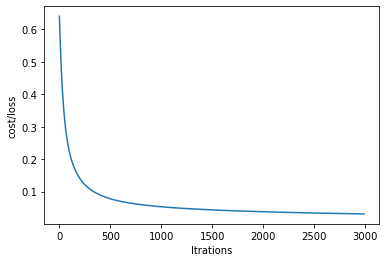

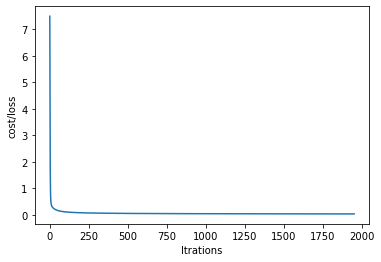

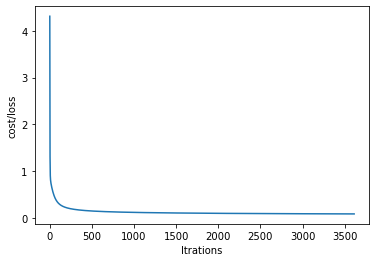

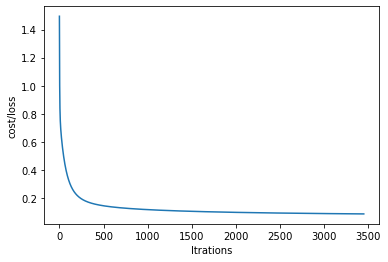

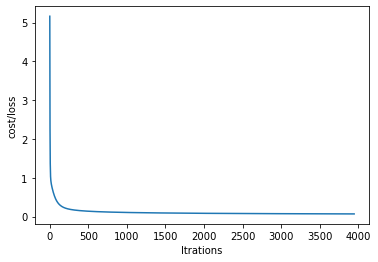

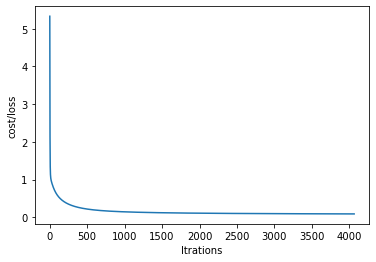

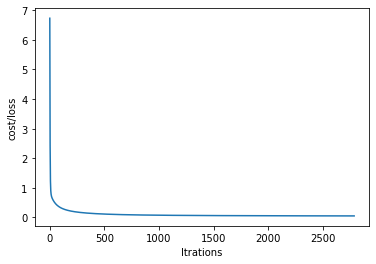

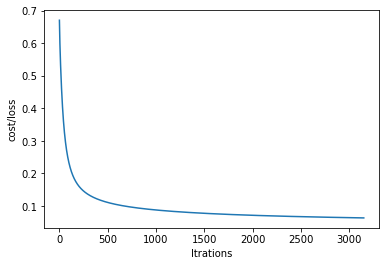

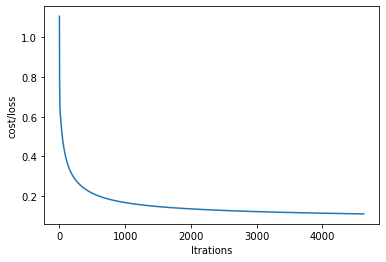

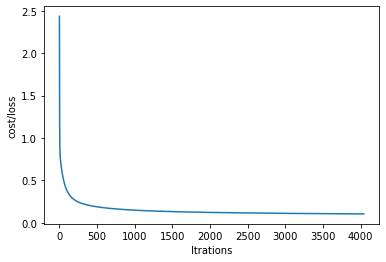

In [29]:
# How loss/cost goes to zero and our model is converges

for i in range(10):
  plt.plot(cost_values[i])
  plt.xlabel("Itrations")
  plt.ylabel("cost/loss")
  plt.show()


# ***Support Vector Machine Classification ***



In [30]:
# SVM start here   accuracy.append(acc)


# sklearn modules 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
# data.head()

Spliting data into train and test

In [32]:
X = data.drop(labels='class',axis='columns') 
y = data['class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)  
svm_model = svm.SVC() 
svm_model.fit(X_train, y_train) 
svm_predict = svm_model.predict(X_test) 


Accuracy Score

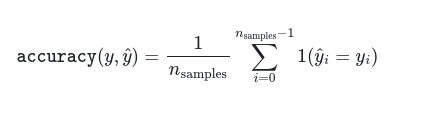

In [33]:
img = Image(filename='images//accuracy score.png') 
display(img)

In [34]:
# accuracy score for the classification 
svm_accuracy = metrics.accuracy_score(y_test, svm_predict, normalize=False)
svm_accuracy

1423

Classification Report

In [35]:
# generate the report of the SVM classifier 
target_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# classification Report shows the important reports 
print(metrics.classification_report(y_test, svm_predict, target_names=target_classes))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       164
           1       0.95      0.97      0.96       152
           2       0.95      0.94      0.94       155
           3       0.95      0.90      0.93       154
           4       0.93      0.93      0.93       143
           5       0.91      0.96      0.93       141
           6       0.97      0.97      0.97       143
           7       0.96      0.92      0.94       158
           8       0.97      0.96      0.97       132
           9       0.94      0.93      0.93       158

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500



Confusion Matrix 

In [36]:
# confusion matrix for the classification  
svm_confusion_matrix = metrics.multilabel_confusion_matrix(y_test, svm_predict) 
svm_confusion_matrix 

array([[[1329,    7],
        [   0,  164]],

       [[1340,    8],
        [   4,  148]],

       [[1338,    7],
        [  10,  145]],

       [[1339,    7],
        [  15,  139]],

       [[1347,   10],
        [  10,  133]],

       [[1346,   13],
        [   6,  135]],

       [[1352,    5],
        [   4,  139]],

       [[1336,    6],
        [  12,  146]],

       [[1364,    4],
        [   5,  127]],

       [[1332,   10],
        [  11,  147]]])

# *** Random Forest Classifier ***

In [37]:
# random forest 
from sklearn import ensemble 

In [38]:
# data.head(5)

In [39]:
X = data.drop(labels='class',axis='columns') 
y = data['class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)  


random_forest_classifier = ensemble.RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
rfc_predict = random_forest_classifier.predict(X_test)
score = random_forest_classifier.score(X_test, y_test)
print(score)

0.9293333333333333


Accuracy score 

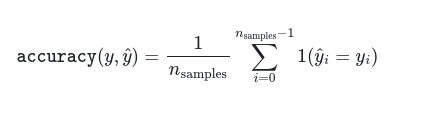

In [40]:
img = Image(filename='images//accuracy score.png') 
display(img)

In [41]:
# accuracy score for the classification 
rfc_accuracy = metrics.accuracy_score(y_test, rfc_predict, normalize=False)
rfc_accuracy

1394

Classification Report

In [42]:
# generate the report of the SVM classifier 
target_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# classification Report shows the important reports 
print(metrics.classification_report(y_test, rfc_predict, target_names=target_classes))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       164
           1       0.95      0.97      0.96       152
           2       0.92      0.93      0.93       155
           3       0.91      0.86      0.89       154
           4       0.92      0.92      0.92       143
           5       0.92      0.90      0.91       141
           6       0.97      0.97      0.97       143
           7       0.95      0.92      0.94       158
           8       0.88      0.91      0.90       132
           9       0.91      0.91      0.91       158

    accuracy                           0.93      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       0.93      0.93      0.93      1500



Confusion Matrix 

In [43]:
# confusion matrix for the classification  
rfc_confusion_matrix = metrics.multilabel_confusion_matrix(y_test, rfc_predict) 
rfc_confusion_matrix 

array([[[1328,    8],
        [   2,  162]],

       [[1341,    7],
        [   4,  148]],

       [[1333,   12],
        [  11,  144]],

       [[1333,   13],
        [  21,  133]],

       [[1345,   12],
        [  11,  132]],

       [[1348,   11],
        [  14,  127]],

       [[1352,    5],
        [   4,  139]],

       [[1334,    8],
        [  12,  146]],

       [[1352,   16],
        [  12,  120]],

       [[1328,   14],
        [  15,  143]]])

# *** Decision Tree Classifier ***

In [44]:
# decision Tree Classifier 
from sklearn import tree

In [45]:
# data.head(10)

In [46]:
X = data.drop(labels='class',axis='columns') 
y = data['class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)  


dtc_classifier = tree.DecisionTreeClassifier()
dtc_classifier.fit(X_train, y_train)
dtc_predict = dtc_classifier.predict(X_test)

score = dtc_classifier.score(X_test, y_test)
print(score) 

0.766


Accuracy Score

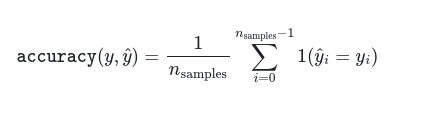

In [47]:
img = Image(filename='images//accuracy score.png') 
display(img)

In [48]:
# accuracy score for the classification 
dtc_accuracy = metrics.accuracy_score(y_test, dtc_predict, normalize=False)
dtc_accuracy

1149

Classification Report 

In [49]:
# generate the report of the SVM classifier 
target_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# classification Report shows the important reports 
print(metrics.classification_report(y_test, dtc_predict, target_names=target_classes))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       164
           1       0.90      0.91      0.91       152
           2       0.77      0.70      0.73       155
           3       0.68      0.62      0.65       154
           4       0.79      0.76      0.77       143
           5       0.67      0.77      0.72       141
           6       0.85      0.84      0.84       143
           7       0.73      0.75      0.74       158
           8       0.66      0.64      0.65       132
           9       0.74      0.74      0.74       158

    accuracy                           0.77      1500
   macro avg       0.76      0.76      0.76      1500
weighted avg       0.77      0.77      0.77      1500



Confusion Matrix

In [50]:
# confusion matrix for the classification  
dtc_confusion_matrix = metrics.multilabel_confusion_matrix(y_test, dtc_predict) 
dtc_confusion_matrix 

array([[[1312,   24],
        [  15,  149]],

       [[1332,   16],
        [  13,  139]],

       [[1312,   33],
        [  46,  109]],

       [[1300,   46],
        [  58,   96]],

       [[1328,   29],
        [  35,  108]],

       [[1305,   54],
        [  32,  109]],

       [[1335,   22],
        [  23,  120]],

       [[1299,   43],
        [  40,  118]],

       [[1325,   43],
        [  48,   84]],

       [[1301,   41],
        [  41,  117]]])

# *** Multi Layer Perceptron with Tensorflow ***

In [51]:
# Multi layer perceptorn with Tensorflow

In [52]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [53]:
# data.head(5)

Spliting Data into train and test 

In [54]:
X = data.drop(labels='class',axis='columns') 
y = data['class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)  


Creating the validation set

In [55]:
X_validation = X_train[3150:3500]
X_train = X_train[0:3150]
y_validation = y_train[3150:3500]
y_train = y_train[0:3150]
# print(X_validation.shape)
# print(y_validation.shape)
# print(X_train.shape)
# print(y_train.shape)
# print(type(X_validation))
# print(X_validation)


 label to one hot encoding value
    - Don't run two times other wise create the problems





In [56]:
# Don't run two times other wise create the problems
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_validation = tf.keras.utils.to_categorical(y_validation, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [57]:
print(y_train.shape)
print(y_validation.shape)
print(y_test.shape) 

(3150, 10)
(350, 10)
(1500, 10)


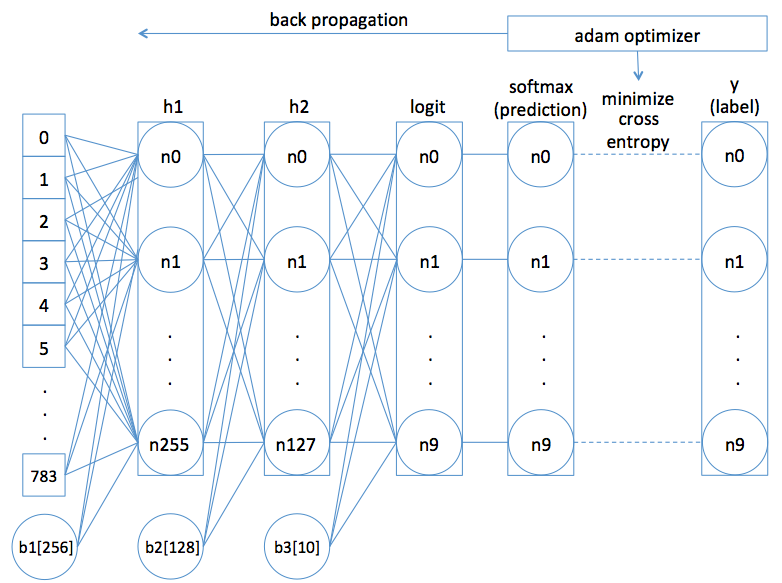

In [58]:
img = Image(filename='images//simple_mlp_mnist.png') 
display(img) 

In [59]:
x = tf.placeholder(tf.float32, [None, 400])
y = tf.placeholder(tf.float32, [None, 10])

In [60]:
def mlp(x):
    # hidden layer1
    w1 = tf.Variable(tf.random_uniform([400,256]))
    b1 = tf.Variable(tf.zeros([256]))
    h1 = tf.nn.relu(tf.matmul(x, w1) + b1)
    # hidden layer2
    w2 = tf.Variable(tf.random_uniform([256,128]))
    b2 = tf.Variable(tf.zeros([128]))
    h2 = tf.nn.relu(tf.matmul(h1, w2) + b2)
    # hidden layer3
    w3 = tf.Variable(tf.random_uniform([128,64]))
    b3 = tf.Variable(tf.zeros([64]))
    h3 = tf.nn.relu(tf.matmul(h2, w3) + b3)
    # output layer
    w4 = tf.Variable(tf.random_uniform([64,10]))
    b4 = tf.Variable(tf.zeros([10]))
    logits= tf.matmul(h3, w4) + b4
    
    return logits

In [61]:
logits = mlp(x)

In [62]:
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2( 
    logits=logits, labels=y)) 

In [63]:
train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss_op) 

In [64]:
# initialize
init = tf.global_variables_initializer()

# train hyperparameters
epoch_cnt = 150
batch_size = 1000
iteration = len(X_train) // batch_size

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    for epoch in range(epoch_cnt):
        avg_loss = 0.
        start = 0; end = batch_size
        
        for i in range(iteration):
            _, loss = sess.run([train_op, loss_op], 
                               feed_dict={x: X_train[start: end], y: y_train[start: end]})
            start += batch_size; end += batch_size
            # Compute average loss
            avg_loss += loss / iteration
            
        # Validate model
        preds = tf.nn.softmax(logits)  # Apply softmax to logits
        correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        cur_val_acc = accuracy.eval({x: X_validation, y: y_validation})
        print("epoch : "+str(epoch)+"============== \n, validation accuracy: " 
              + str(cur_val_acc) +', \n loss: '+str(avg_loss))
    
    # Test model
    preds = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("[Test Accuracy] :", accuracy.eval({x: X_test, y: y_test}))
    mlp_accuracy = accuracy.eval({x: X_test, y: y_test})

epoch : 0============== 
, validation accuracy: 0.12, 
 loss: 377949.1666666667
epoch : 1============== 
, validation accuracy: 0.08571429, 
 loss: 276155.0208333334
epoch : 2============== 
, validation accuracy: 0.111428574, 
 loss: 251983.6510416667
epoch : 3============== 
, validation accuracy: 0.111428574, 
 loss: 280299.6197916667
epoch : 4============== 
, validation accuracy: 0.08571429, 
 loss: 218206.35416666666
epoch : 5============== 
, validation accuracy: 0.08857143, 
 loss: 120949.390625
epoch : 6============== 
, validation accuracy: 0.108571425, 
 loss: 68689.48697916666
epoch : 7============== 
, validation accuracy: 0.08285714, 
 loss: 51587.96744791667
epoch : 8============== 
, validation accuracy: 0.108571425, 
 loss: 51280.45182291667
epoch : 9============== 
, validation accuracy: 0.08857143, 
 loss: 43406.639322916664
epoch : 10============== 
, validation accuracy: 0.12571429, 
 loss: 44464.74348958333
epoch : 11============== 
, validation accuracy: 0.085714

# *** Comparision of the Models ***

In [65]:
print(f"Logistic Accuracy : {(accuratepredicts/5000)*100 }")
print(f"Support Vector Machinmlp_accuracyes Accuracy : {svm_accuracy}")
print(f"Random forest Accuracy : {rfc_accuracy}")
print(f"Dicision Tree Accuracy : {dtc_accuracy}")
# Calculate accuracy
print(f"Mulit Layer Perceptron : {mlp_accuracy}")

# accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
# print("[Test Accuracy of the multi layer perceptron] :", accuracy.eval({x: X_test, y: y_test}))

Logistic Accuracy : 90.98
Support Vector Machinmlp_accuracyes Accuracy : 1423
Random forest Accuracy : 1394
Dicision Tree Accuracy : 1149
Mulit Layer Perceptron : 0.8479999899864197


In [66]:
print(f"Logistic Confusion Matrix : {logistic_confusion_matrix}")
print(f"Support Vector Machines Confusion Matrix : {svm_confusion_matrix}")
print(f"Random Forest Confusion Matrix : {rfc_confusion_matrix}")
print(f"Dicision Tree Confusion Matrix : {dtc_confusion_matrix}")


Logistic Confusion Matrix : [array([[ 476, 4474],
       [  26,   24]]), array([[ 469, 4471],
       [  29,   31]]), array([[ 402, 4461],
       [  39,   98]]), array([[ 410, 4458],
       [  42,   90]]), array([[ 435, 4462],
       [  38,   65]]), array([[ 395, 4457],
       [  43,  105]]), array([[ 458, 4468],
       [  32,   42]]), array([[ 442, 4460],
       [  40,   58]]), array([[ 366, 4442],
       [  58,  134]]), array([[ 399, 4429],
       [  71,  101]])]
Support Vector Machines Confusion Matrix : [[[1329    7]
  [   0  164]]

 [[1340    8]
  [   4  148]]

 [[1338    7]
  [  10  145]]

 [[1339    7]
  [  15  139]]

 [[1347   10]
  [  10  133]]

 [[1346   13]
  [   6  135]]

 [[1352    5]
  [   4  139]]

 [[1336    6]
  [  12  146]]

 [[1364    4]
  [   5  127]]

 [[1332   10]
  [  11  147]]]
Random Forest Confusion Matrix : [[[1328    8]
  [   2  162]]

 [[1341    7]
  [   4  148]]

 [[1333   12]
  [  11  144]]

 [[1333   13]
  [  21  133]]

 [[1345   12]
  [  11  132]]

 [[13